In [ ]:
#Main Libraries
import os
import pandas as pd
import numpy as np
import random
import string
import os
import random
import glob

#Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
seed=11

In [ ]:
def set_seed_for_everything(seed):
  # Set the seed for the built-in Python random number generator.
  random.seed(seed)

  # Set the seed for Python's hash function, which affects hash-based data structures.
  os.environ["PYTHONHASHSEED"] = str(seed)

  # Set the seed for the NumPy random number generator.
  np.random.seed(seed)

  # Set the seed for the TensorFlow random number generator.
  tf.random.set_seed(seed)

# Call the function to set the seeds for various random number generators.
set_seed_for_everything(seed)


In [ ]:
# csv_file_path = "/content/drive/MyDrive/MeDal/labels_gt_267.csv"

csv_file_path = "C:\\Users\\sg709\\Downloads\\AutoCorrect_And_Autocomplete_medical_terms_Using_LSTM\\Data\\Biology_words_data.csv"

# Read the CSV file into a pandas DataFrame
biology_words = pd.read_csv(csv_file_path)

In [ ]:
biology_words.tail()

,Biology_Words
1342,Chemotrophy (chemo - trophy)
1343,Electrotroph (electro - troph)
1344,Necrotroph (necro - troph)
1345,Oligotroph (oligo - troph)
1346,Oxalotrophy (oxalo - trophy)


In [ ]:
import pandas as pd

biology_words.rename(columns={'label': 'Biology_Words'}, inplace=True)


In [ ]:
biology_words.head()

,Biology_Words
0,abiotic component
1,abscission
2,absorption
3,absorption spectrum
4,acclimatization


In [ ]:
number_of_words=200

In [ ]:
"""
This function is used to get the general information about dataframe.
Like The number of columns, Unique Values in a colmn, Total Value count, Total Null, Shape, size in a dataframe
"""
def general_info_dataframe(df,name="FULL DATA",column="label"):
  print(f"{name} Number of unique values in column {column} ",df[column].nunique())
  print("-----------------------------------------------------")
  print(f"{name} unique values in column {column} ",df[column].unique())
  print("-----------------------------------------------------")
  print(f"Number of classes of biology words in {name}\n",df[column].value_counts())
  print("-----------------------------------------------------")
  print(f"{name} SHAPE",df.shape)
  print("-----------------------------------------------------")
  print(f"{name} Size",df.size)

# general_info_dataframe(train_data,name="TRAIN DATA",column="label")

**To Add Original Label in the dataset**

In [ ]:
def replace_letter_one_by_one(word, old_char, new_char):
    # Initialize an empty list to store the resulting words
    new_words = []

    # Loop through each character in the word
    for i in range(len(word)):
        # If the character at position i matches the old_char
        if word[i] == old_char:
            # Create a new word by replacing the character at position i with the new_char
            new_word = word[:i] + new_char + word[i + 1:]
            # Append the new word to the list of resulting words
            new_words.append(new_word)

    # Return the list of resulting words
    return new_words


# word = "Abdominal Cavity"
# old_char = "a"
# new_char = "o"
# new_words = replace_letter_one_by_one(word, old_char, new_char)
# print(new_words)

In [ ]:
def add_original_label(word):
   # Initialize lists for storing original and predicted words.
  predicted_word_list=[word] # List to store predicted words (initially contains the given 'word').
  actual_word_list=[word]# List to store actual/original words (initially contains the given 'word').
  # predicted_word_list.append(word)
  # actual_word_list.append(word)

   # Return the lists containing the original 'word'.
  return actual_word_list, predicted_word_list

# word= "Abdomentbse Cavity"
# word=word.upper()
# actual_word_list,predicted_word_list=add_original_label(word)
# print("actual_word_list",actual_word_list)
# print("predicted_word_list",predicted_word_list)

In [ ]:
# Function to Generate Auto-Predict Data
def auto_predict_data_generate(word):
    actual_word_list = []       # List to store actual words.
    autopredict_word_list = []  # List to store auto-predicted words.

    # Check if the length of the input 'word' is greater than 5.
    if len(word) > 5:
        # Generate auto-predicted words by taking substrings of length 6 or more.
        autopredict_word_list = [word[:i] for i in range(6, len(word) + 1)]
    else:
        # If the word is 5 characters or shorter, use the whole word for auto-prediction.
        autopredict_word_list = [word]

    # Create a list of actual words, where each word is the same as the input 'word'.
    actual_word_list = [word] * len(autopredict_word_list)

    # Return the lists containing actual and auto-predicted words.
    return actual_word_list, autopredict_word_list

# Example Usage
# Convert the word to uppercase.
# Generate lists of actual and auto-predicted words using the 'auto_predict_data_generate' function.
# word = "Abdomenal Cavity"
# word=word.upper()
# actual_word_list,autopredict_word_list=auto_predict_data_generate(word)
# print("actual_word_list",actual_word_list)
# print("autopredict_word_list",autopredict_word_list)

In [ ]:
def substitution_of_char(word):
  """
    Perform character substitution for data augmentation.

    This function takes an input word and performs character substitution based on the substitution_data dictionary,
    where the keys represent incorrect characters to be replaced, and the values represent the correct characters.
    It generates a list of words by substituting each incorrect character with the corresponding correct character.

    Parameters:
        word (str): The input word for which character substitution will be performed.

    Returns:
        tuple: A tuple containing two lists - actual_word_list and substituted_word_list. actual_word_list contains
        the original input word repeated for each substitution, and substituted_word_list contains all the words generated
        by substituting characters in the input word.

    Example Usage:
        word = "CAT"
        actual, substituted = substitution_of_char(word)
        print("Original word list:", actual)
        print("Substituted words list:", substituted)

    Output:
        Original word list: ['CAT']
        Substituted words list: ['MAT', 'CUT', 'CAS', 'CAL', 'CAT', 'LUT', 'AUT', 'CAV', 'UAT']
    """
  substitution_data = {"A":"S","C":"L","D":"E","K":"V","M":"N","N": "M","R": "U","T": "Y","V":"K"}
  #sub[X, Y] = Substitution of X (incorrect) for Y (correct)

  substituted_word_list=[]
  actual_word=[]

  for old_char,new_char in substitution_data.items():
    if old_char in word:
      # replaced_all_occurence_word = word.replace(old_char, new_char)
      # if replaced_all_occurence_word:
      #   substituted_word_list.append(replaced_all_occurence_word)

      w = replace_letter_one_by_one(word, old_char, new_char)
      if w:
        substituted_word_list.extend(w)

  all_words_change = ''.join(substitution_data.get(char, char) for char in word)
  substituted_word_list.append(all_words_change)

  substituted_word_list= (list(set(substituted_word_list)))
  actual_word_list=[word]*len(substituted_word_list)
  # print(len(actual_word_list))
  return actual_word_list,substituted_word_list



# word= "Abdominal Cavity"
# word=word.upper()
# actual_word_list, substituted_word_list=substitution_of_char(word)

# print("actual_word_list",actual_word_list)
# print("substituted_word_list",substituted_word_list)

**Create a Dataset by Dividing Words into Different Lengths for Auto Predict Problem**

In [ ]:
def create_data_for_each_word_for_RNN(word):
  final_list =[]
  actual_word_list=[]
  word=word.upper()

  #Add Original Label
  _,predicted_word_list=add_original_label(word)
  final_list.extend(predicted_word_list)

  #Add Substitution Character Function
  _, substituted_word_list=substitution_of_char(word)
  final_list.extend(substituted_word_list)

  #Add Auto predict Function which creates words of different lengths
  _,autopredict_word_list=auto_predict_data_generate(word)
  final_list.extend(autopredict_word_list)

  final_list=(list(set(final_list)))
  actual_word_list=[word]*len(final_list)
  return actual_word_list,final_list


# word= "articulati"
# actual_word_list, final_list=create_data_for_each_word_for_RNN(word)
# print("actual_word_list\n",len(actual_word_list),actual_word_list)
# print("final_list\n",len(final_list),final_list)

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(word_list, test_size=0.3, random_state=11):
    """
    Split Data into Train and Test Sets

    Args:
        word_list (list): List of words to create data for.
        test_size (float, optional): Proportion of the dataset to include in the test split. Default is 0.3.
        random_state (int, optional): Seed for the random number generator. Default is 11.

    Returns:
        train_data (DataFrame): DataFrame containing training data.
        test_data (DataFrame): DataFrame containing test data.
    """
    columns = ['Biology_Words', 'Incorrect_Words']
    train_data = pd.DataFrame(columns=columns)
    test_data = pd.DataFrame(columns=columns)

    for word in word_list:
        # Create actual and incorrect word data for each word
        actual_words, incorrect_words = create_data_for_each_word_for_RNN(word)
        word_df = pd.DataFrame({"Biology_Words": actual_words, "Incorrect_Words": incorrect_words})

        # Only include words with at least two samples for splitting
        if len(word_df) >= 2:
            # Split data into train and test sets for each word
            word_based_train_data, word_based_test_data = train_test_split(word_df, test_size=test_size, random_state=random_state)

            # Concatenate word-based train and test data to the overall train and test data
            train_data = pd.concat([train_data, word_based_train_data], ignore_index=True)
            test_data = pd.concat([test_data, word_based_test_data], ignore_index=True)

    return train_data, test_data

#Example usage
# train_data, test_data = split_data(biology_words_list, test_size=0.2, random_state=11)

In [ ]:
# Extracting Biology Words List
# Copy the first 'number_of_words' rows from the 'biology_words' DataFrame to a new DataFrame 'biology_words_cpy'.
biology_words_cpy = biology_words.head(number_of_words).copy()

# Extract the "Biology_Words" column from the copied DataFrame to create a list of biology words.
biology_words_list = biology_words_cpy["Biology_Words"]


In [ ]:
biology_words_cpy

,Biology_Words
0,abiotic component
1,abscission
2,absorption
3,absorption spectrum
4,acclimatization
...,...
195,flagellum
196,flavin adenine dinucleotide (FAD)
197,food chain
198,foramen


In [ ]:
import pandas as pd

# Assuming you have your data in a pandas DataFrame called "data"
train_data, test_data = split_data(biology_words_list, test_size=0.2, random_state=11)

In [ ]:
train_data= pd.concat([train_data, test_data], axis=0)
# Reset the index of the combined DataFrame
train_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data.tail()

,Biology_Words,Incorrect_Words
2688,FORAMEN,FORAMEM
2689,FORAMEN,FOUSNEM
2690,FOUNDER EFFECT,FOUNDER EFFECT
2691,FOUNDER EFFECT,FOUNDER EFFEC
2692,FOUNDER EFFECT,FOUNDER EFFE


In [ ]:
general_info_dataframe(train_data,name="TRAIN DATA",column="Biology_Words")

TRAIN DATA Number of unique values in column Biology_Words  198
-----------------------------------------------------
TRAIN DATA unique values in column Biology_Words  ['ABIOTIC COMPONENT' 'ABSCISSION' 'ABSORPTION' 'ABSORPTION SPECTRUM'
 'ACCLIMATIZATION' 'ACETYL-COA' 'ACOELOMATE' 'ACTION POTENTIAL'
 'ACTIVATION ENERGY' 'ACTIVE SITE' 'ACTIVE TRANSPORT' 'ADAPTATION'
 'ADAPTIVE RADIATION' 'ADENINE' 'ADENOSINE TRIPHOSPHATE (ATP)'
 'ADIPOSE TISSUE' 'AEROBIC' 'AEROBIOLOGY' 'AGRICULTURE' 'AGROBIOLOGY'
 'ALGA' 'ALLOPATRIC SPECIATION' 'AMINO ACID' 'AMNIOTE' 'ANAEROBIC'
 'ANALOGOUS STRUCTURES' 'ANATOMY' 'ANIMAL' 'ANTIBIOTIC' 'APOPTOSIS'
 'ARACHNOLOGY' 'ARCHAEA' 'ARTIFICIAL SELECTION' 'ASEXUAL REPRODUCTION'
 'ASTROBIOLOGY' 'AUTOIMMUNITY' 'AUTOTROPH' 'B CELL' 'BACTERIA'
 'BACTERIOPHAGE' 'BARR BODY' 'BASAL BODY' 'BEHAVIORAL ECOLOGY'
 'BINARY FISSION' 'BINOMIAL NOMENCLATURE' 'BIOCATALYSIS' 'BIOCHEMISTRY'
 'BIODIVERSITY' 'BIOENGINEERING' 'BIOENERGETICS' 'BIOGEOGRAPHY'
 'BIOINFORMATICS' 'BIOLOGICAL O

In [ ]:
train_data

,Biology_Words,Incorrect_Words
0,ABIOTIC COMPONENT,ABIOYIC COMPONENT
1,ABIOTIC COMPONENT,ABIOTIC COMPON
2,ABIOTIC COMPONENT,ABIOTIC LOMPONENT
3,ABIOTIC COMPONENT,ABIOTIC COM
4,ABIOTIC COMPONENT,ABIOTIC COMP
...,...,...
2688,FORAMEN,FORAMEM
2689,FORAMEN,FOUSNEM
2690,FOUNDER EFFECT,FOUNDER EFFECT
2691,FOUNDER EFFECT,FOUNDER EFFEC


## **To Check the current vocabulary size**


In [ ]:
# Concatenate all the characters in the 'text' column into a single string
all_characters_biology_words_df = ''.join(train_data['Biology_Words'])
unique_characters_biology_df= set(all_characters_biology_words_df)
print(unique_characters_biology_df)

all_characters_incorrect_Words_df = ''.join(train_data['Incorrect_Words'])
unique_characters_incorrect_df= set(all_characters_incorrect_Words_df)
print(unique_characters_incorrect_df)


{'A', ' ', '(', '–', 'H', ')', 'W', 'V', 'Y', 'S', 'C', '-', 'F', 'X', 'R', 'P', 'E', 'L', 'T', 'O', 'B', 'I', 'M', 'N', 'Z', 'Q', 'D', 'G', ',', 'U', 'K'}
{'A', ' ', '(', '–', 'H', ')', 'W', 'V', 'Y', 'S', 'C', '-', 'F', 'X', 'R', 'P', 'E', 'L', 'T', 'O', 'B', 'I', 'M', 'N', 'Z', 'Q', 'D', 'G', ',', 'U', 'K'}


## **Cleaning and Preprocessing Text Data**

In [ ]:
import pandas as pd
import re

def clean_column(column):
    # Use regular expression to remove anything inside brackets and numbers
    cleaned_column = column.apply(lambda word: re.sub(r'\([^)]*\)|\d+', '', word))

    # Keep only the letters "ABCDEFGHIJKLMNOPQRSTUVWXYZ" in the cleaned column
    cleaned_column = cleaned_column.str.replace('[^A-Z]', '', regex=True)

    return cleaned_column

# Example usage:
# Assuming you have a DataFrame named 'df' and you want to clean the 'Biology_Words' column
train_data['Biology_Words']= clean_column(train_data['Biology_Words'])
train_data['Incorrect_Words']= clean_column(train_data['Incorrect_Words'])

## **Rechecking Cleaned columns to ensure only alphabets are passed**

In [ ]:
# Concatenate all the characters in the 'text' column into a single string
all_characters_biology_words_df = ''.join(train_data['Biology_Words'])
unique_characters_biology_df= set(all_characters_biology_words_df)
print(unique_characters_biology_df)
print(len(unique_characters_biology_df))

all_characters_incorrect_Words_df = ''.join(train_data['Incorrect_Words'])
unique_characters_incorrect_df= set(all_characters_incorrect_Words_df)
print(unique_characters_incorrect_df)
print(len(unique_characters_incorrect_df))

{'A', 'H', 'W', 'V', 'Y', 'S', 'C', 'F', 'X', 'R', 'P', 'E', 'L', 'T', 'O', 'B', 'I', 'M', 'N', 'Z', 'Q', 'D', 'G', 'U', 'K'}
25
{'A', 'H', 'W', 'V', 'Y', 'S', 'C', 'F', 'X', 'R', 'P', 'E', 'L', 'T', 'O', 'B', 'I', 'M', 'N', 'Z', 'Q', 'D', 'G', 'U', 'K'}
25


### **Hyperparameter Tuning using Grid Search for Bi-LSTM-Based Model**

In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid

param_grid = {
    'activation': ['relu', 'selu'],
    'neurons_1st_layer': [128, 256],
    'neurons_2nd_layer': [64, 128],
    'neurons_3rd_layer': [64, 128]
}

param_combinations = list(ParameterGrid(param_grid))


# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Activation', 'Neurons 1st Layer', 'Neurons 2nd Layer', 'Neurons 3rd Layer', 'Final Train Loss', 'Final Validation Loss', 'Final Train Accuracy', 'Final Validation Accuracy'])

for params in param_combinations:
    with tf.device('/device:GPU:0'):
        model = Sequential()

        # Build the model using the current parameter combination
        model.add(Embedding(input_dim=len(vocab), output_dim=100, input_length=max_length))

        model.add(Bidirectional(LSTM(params['neurons_1st_layer'], activation=params['activation'], return_sequences=True)))
        model.add(Dropout(0.5))

        model.add(Bidirectional(LSTM(params['neurons_2nd_layer'], activation=params['activation'], return_sequences=True)))
        model.add(Dropout(0.5))

        model.add(Bidirectional(LSTM(params['neurons_3rd_layer'], activation=params['activation'])))
        model.add(Dropout(0.5))

        model.add(Dense(64, activation=params['activation']))

        model.add(Dense(len(label_encoder.classes_), activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1,
                            validation_data=(X_eval, y_eval), callbacks=[early_stopping])

        # Add a new row to the DataFrame using .loc[]
        results_df.loc[len(results_df)] = [
            params['activation'],
            params['neurons_1st_layer'],
            params['neurons_2nd_layer'],
            params['neurons_3rd_layer'],
            history.history['loss'][-1],
            history.history['val_loss'][-1],
            history.history['accuracy'][-1],
            history.history['val_accuracy'][-1]
        ]

# Save the results DataFrame to a CSV file
results_df.to_csv("C:\\Users\\sg709\\Downloads\\AutoCorrect_And_Autocomplete_medical_terms_Using_LSTM\\grid_search_results.csv", index=False)
print("Grid search results saved to 'grid_search_results.csv'")


Epoch 1/100
135/135 [==============================] - 36s 170ms/step - loss: 5.2579 - accuracy: 0.0093 - val_loss: 5.1326 - val_accuracy: 0.0093
Epoch 2/100
135/135 [==============================] - 21s 153ms/step - loss: 5.0227 - accuracy: 0.0121 - val_loss: 4.8554 - val_accuracy: 0.0167
Epoch 3/100
135/135 [==============================] - 21s 152ms/step - loss: 4.8247 - accuracy: 0.0125 - val_loss: 4.7649 - val_accuracy: 0.0130
Epoch 4/100
135/135 [==============================] - 20s 145ms/step - loss: 4.7617 - accuracy: 0.0186 - val_loss: 4.7408 - val_accuracy: 0.0204
Epoch 5/100
135/135 [==============================] - 18s 130ms/step - loss: 5.3042 - accuracy: 0.0186 - val_loss: 5.1012 - val_accuracy: 0.0093
Epoch 6/100
135/135 [==============================] - 19s 142ms/step - loss: 4.7774 - accuracy: 0.0167 - val_loss: 4.6777 - val_accuracy: 0.0111
Epoch 7/100
135/135 [==============================] - 19s 140ms/step - loss: 4.6382 - accuracy: 0.0214 - val_loss: 4.6100 -

### **Training, Saving, and Visualizing Best Bi-LSTM Model with Hyperparameters**

Best Hyperparameters:
Activation                       selu
Neurons 1st Layer                 128
Neurons 2nd Layer                  64
Neurons 3rd Layer                  64
Final Train Loss             0.257809
Final Validation Loss        0.203517
Final Train Accuracy         0.913649
Final Validation Accuracy    0.931354
Name: 8, dtype: object
Epoch 1/100
135/135 [==============================] - 14s 84ms/step - loss: 5.2024 - accuracy: 0.0116 - val_loss: 4.8254 - val_accuracy: 0.0334
Epoch 2/100
135/135 [==============================] - 11s 79ms/step - loss: 4.7154 - accuracy: 0.0353 - val_loss: 4.4187 - val_accuracy: 0.0835
Epoch 3/100
135/135 [==============================] - 11s 79ms/step - loss: 4.1455 - accuracy: 0.0822 - val_loss: 3.6119 - val_accuracy: 0.1670
Epoch 4/100
135/135 [==============================] - 11s 79ms/step - loss: 3.3843 - accuracy: 0.1792 - val_loss: 2.9728 - val_accuracy: 0.2597
Epoch 5/100
135/135 [==============================] - 11s 79ms/step - 

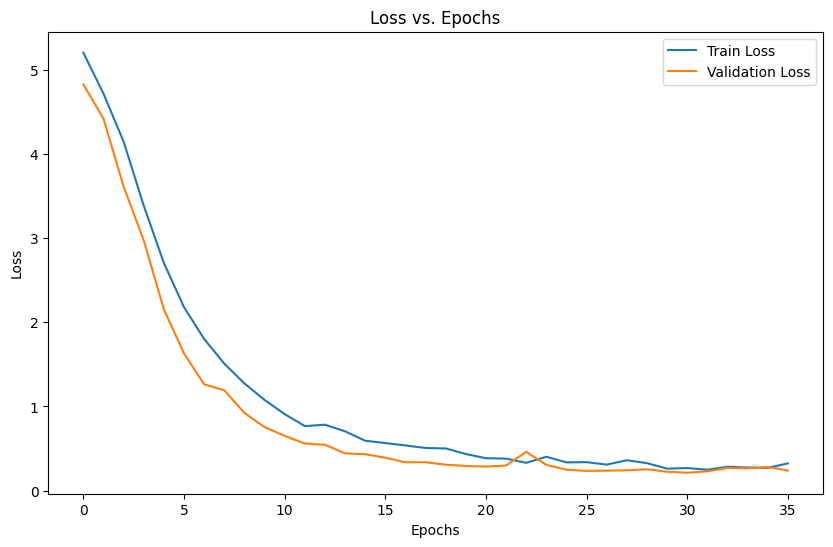

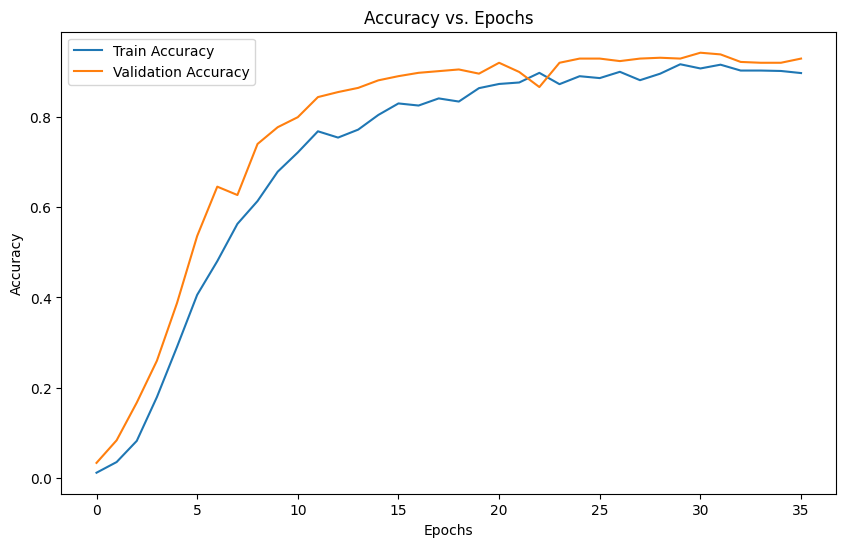

In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt


# After performing grid search and saving results_df, load the results DataFrame
results_df = pd.read_csv('C:\\Users\\sg709\\Downloads\\AutoCorrect_And_Autocomplete_medical_terms_Using_LSTM\\grid_search_results.csv')

# Find the index of the row with the highest validation accuracy
best_model_index = results_df['Final Validation Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best model
best_hyperparameters = results_df.loc[best_model_index]

print("Best Hyperparameters:")
print(best_hyperparameters)

# Build and train the best model using the best_hyperparameters
best_model = Sequential()

best_model.add(Embedding(input_dim=len(vocab), output_dim=100, input_length=max_length))

best_model.add(Bidirectional(LSTM(best_hyperparameters['Neurons 1st Layer'], activation=best_hyperparameters['Activation'], return_sequences=True)))
best_model.add(Dropout(0.5))

best_model.add(Bidirectional(LSTM(best_hyperparameters['Neurons 2nd Layer'], activation=best_hyperparameters['Activation'], return_sequences=True)))
best_model.add(Dropout(0.5))

best_model.add(Bidirectional(LSTM(best_hyperparameters['Neurons 3rd Layer'], activation=best_hyperparameters['Activation'])))
best_model.add(Dropout(0.5))

best_model.add(Dense(64, activation=best_hyperparameters['Activation']))

best_model.add(Dense(len(label_encoder.classes_), activation='softmax'))
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1,
                        validation_data=(X_eval, y_eval), callbacks=[early_stopping])

# Save the best model
best_model.save('C:\\Users\\sg709\\Downloads\\AutoCorrect_And_Autocomplete_medical_terms_Using_LSTM\\Models\\best_model.h5')
print("Best model saved as 'best_model.h5'")

# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


In [ ]:
from keras.models import load_model

# Load the best model from the specified path
loaded_model = load_model('C:\\Users\\sg709\\Downloads\\AutoCorrect_And_Autocomplete_medical_terms_Using_LSTM\\Models\\best_model.h5')

# Print a message indicating that the model has been loaded
print("Best model loaded successfully.")


In [ ]:
def autopredict_word(word,max_length):
  # Assuming you have already defined 'vocab' and 'new_model'
  #Correct word is MONOSACCHARIDE
  data_to_predict = {
      'Incorrect_Words': [word]
  }

  evaluation_df = pd.DataFrame(data_to_predict)

  evaluation_X = evaluation_df['Incorrect_Words'].apply(lambda word: np.array([vocab.index(c) for c in word.upper()]))
  # print("evaluation_X\n", evaluation_X)

  # Convert the Series of numpy arrays to a 2D numpy array
  evaluation_X_array = np.array(evaluation_X.tolist())

  # Pad the sequences to make them the same length as the model's input
  # max_length = 26
  evaluation_X_padded = pad_sequences(evaluation_X_array, maxlen=max_length)

  y_pred_probabilities = best_model.predict(evaluation_X_padded)
  y_pred_labels = np.argmax(y_pred_probabilities, axis=1)
  y_pred_labels = label_encoder.inverse_transform(y_pred_labels)
  return y_pred_labels[0]

max_length=34
word="MONOSACCHARID"
predictedd_word_by_model = autopredict_word(word,max_length)
print("Word predicted by model is : ",predictedd_word_by_model)

In [ ]:
# Define the vocabulary list to include all uppercase letters, lowercase letters, and parentheses
vocab = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Loop to take user input
user_input = ""
while True:
    char = input("Enter a character (or 'YES' to stop): ").strip().upper()

    # Check if the user wants to stop entering characters
    if char == "YES":
        break

    if char not in vocab:
        print("Invalid character. Please enter a valid character.")
        continue

    user_input += char
    max_length=34
    word=user_input
    predictedd_word_by_model = autopredict_word(word,max_length)
    print("Word predicted by model is : ",predictedd_word_by_model)

